#**Presidential Debate Twitter Sentiment Analysis**
------






In [1]:
!pip install -q kaggle # installing the kaggle package

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d headsortails/us-election-2020-presidential-debates

In [ ]:
!unzip dataset.zip

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('/content/data.csv')

In [20]:
df['speaker'].value_counts()

President Donald J. Trump    314
Vice President Joe Biden     249
Chris Wallace                225
Chris Wallace:                 1
Name: speaker, dtype: int64

In [53]:
# Remove rows with a specific speaker name
speaker_to_remove = 'Chris Wallace:'
df = df[df['speaker'] != speaker_to_remove]

In [7]:
df['speaker'].value_counts()

President Donald J. Trump    314
Vice President Joe Biden     249
Chris Wallace                225
Name: speaker, dtype: int64

In [54]:
# Create a list of unique speaker names
unique_speakers = df['speaker'].unique()

# Create a new column for each unique speaker using one-hot encoding
for speaker in unique_speakers:
    df[speaker] = (df['speaker'] == speaker).astype(int)

In [28]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df.head()

,speaker,minute,text,Chris Wallace,Vice President Joe Biden,President Donald J. Trump
0,Chris Wallace,01:20,Good evening from the Health Education Campus ...,1,0,0
1,Chris Wallace,02:10,This debate is being conducted under health an...,1,0,0
2,Vice President Joe Biden,02:49,"How you doing, man?",0,1,0
3,President Donald J. Trump,02:51,How are you doing?,0,0,1
4,Vice President Joe Biden,02:51,I’m well.,0,1,0


In [55]:
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['text'].apply(lambda x: preprocess_tweets(x))

In [56]:
print('Base review\n', df['text'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 Good evening from the Health Education Campus of Case Western Reserve University and the Cleveland Clinic. I’m Chris Wallace of Fox News and I welcome you to the first of the 2020 Presidential Debates between President Donald J. Trump and former Vice President Joe Biden. This debate is sponsored by the Commission on Presidential debates. The Commission has designed the format, six roughly 15 minute segments with two minute answers from each candidate to the first question, then open discussion for the rest of each segment. Both campaigns have agreed to these rules. For the record, I decided the topics and the questions in each topic. I can assure you none of the questions has been shared with the Commission or the two candidates.

------------------------------------

Cleaned and lemmatized review
 Good evening Health Education Campus Case Western Reserve University Cleveland Clinic. I’m Chris Wallace Fox News I welcome first 2020 Presidential Debates President Donald J. T

In [57]:
df = df.drop(['text', 'speaker'], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 788
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Chris Wallace              788 non-null    int64 
 1   Vice President Joe Biden   788 non-null    int64 
 2   President Donald J. Trump  788 non-null    int64 
 3   Processed Tweet            788 non-null    object
dtypes: int64(3), object(1)
memory usage: 46.9+ KB


In [58]:
df = df.rename(columns={'Chris Wallace': 'chris'})
df = df.rename(columns={'Vice President Joe Biden': 'biden'})
df = df.rename(columns={'President Donald J. Trump': 'trump'})

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 0 to 788
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   minute           788 non-null    object
 1   chris            788 non-null    int64 
 2   biden            788 non-null    int64 
 3   trump            788 non-null    int64 
 4   Processed Tweet  788 non-null    object
dtypes: int64(3), object(2)
memory usage: 53.1+ KB


In [60]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [61]:
df.head()

,minute,chris,biden,trump,Processed Tweet,polarity,subjectivity
0,01:20,1,0,0,Good evening Health Education Campus Case West...,0.237500,0.383333
1,02:10,1,0,0,This debate conducted health safety protocol d...,0.371429,0.633929
2,02:49,0,1,0,"How doing, man?",0.000000,0.000000
3,02:51,0,0,1,How doing?,0.000000,0.000000
4,02:51,0,1,0,I’m well.,0.000000,0.000000


In [62]:
display(df[df['chris']==1][['chris','polarity','subjectivity']].groupby('chris').agg([np.mean, np.max, np.min, np.median]))

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
chris                                                         
1      0.068117  0.7 -0.4    0.0     0.203708  1.0  0.0    0.0

In [63]:
df[df['biden']==1][['biden','polarity','subjectivity']].groupby('biden').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                    
           mean amax amin median         mean amax amin    median
biden                                                            
1      0.083134  0.8 -1.0    0.0     0.295854  1.0  0.0  0.216667

In [64]:
df[df['trump']==1][['trump','polarity','subjectivity']].groupby('trump').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                    
           mean amax amin median         mean amax amin    median
trump                                                            
1      0.036381  0.8 -1.0    0.0     0.242347  1.0  0.0  0.066667

In [65]:
chris = df[df['chris']==1][['minute', 'polarity']]
chris = chris.sort_values(by='minute', ascending=True)
chris['MA Polarity'] = chris.polarity.rolling(10, min_periods=3).mean()

biden = df[df['biden']==1][['minute', 'polarity']]
biden = biden.sort_values(by='minute', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['trump']==1][['minute', 'polarity']]
trump = trump.sort_values(by='minute', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [66]:
trump.head()

,minute,polarity,MA Polarity
180,00:15,0.000000,NaN
182,00:23,0.000000,NaN
184,00:42,0.200000,0.066667
186,00:53,0.000000,0.050000
188,01:00,0.028571,0.045714


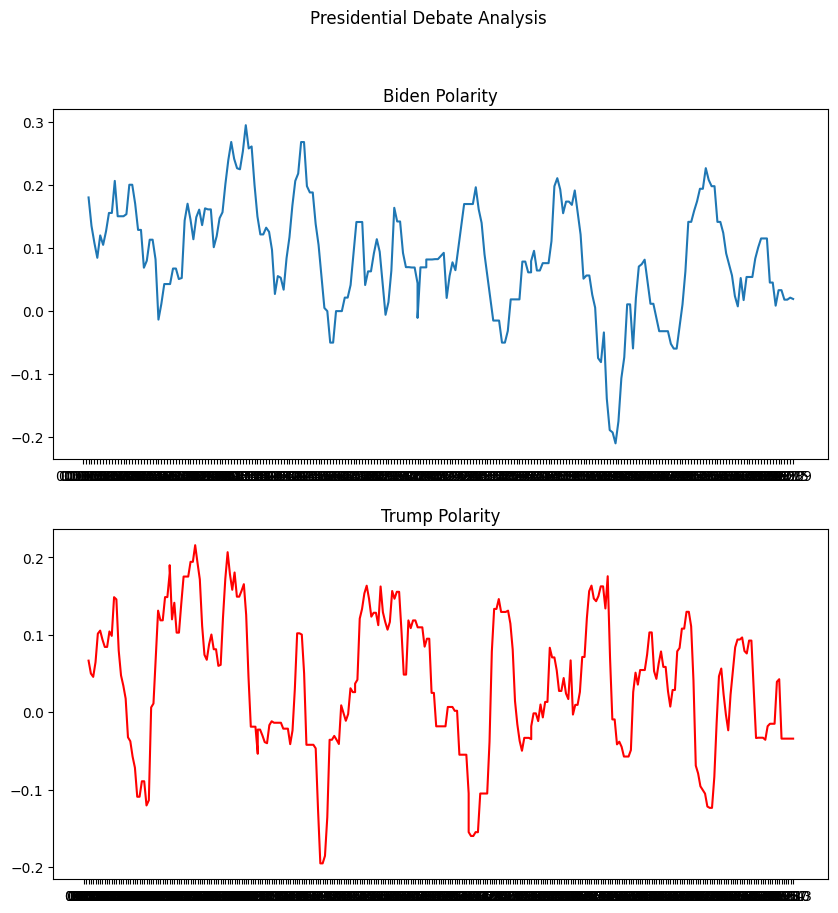

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].plot(biden['minute'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['minute'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()